# Images of Stairs

Classify images of a "stairs" pattern within 2x2 grayscale images.

### Importing necessary modules.

In [26]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
sns.set()

### Take a look at the data

In [2]:
df = pd.read_csv('data/train.csv').append(pd.read_csv('data/test.csv'))
df.head()

,ImageId,R1C1,R1C2,R2C1,R2C2,IsStairs
0,1,252,4,155,175,1
1,2,175,10,186,200,1
2,3,82,131,230,100,0
3,4,115,138,80,88,0
4,5,27,60,194,238,0


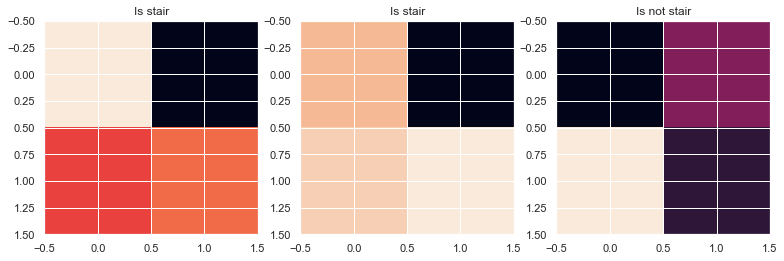

In [3]:
plt.figure(figsize=(13, 7))

for i in range(3):
    plt.subplot(130 + 1 + i)
    current_datapoint = df.values[i]
    plt.title('Is stair' if current_datapoint[-1] == 1 else 'Is not stair')
    plt.imshow(current_datapoint[1:-1].reshape(2, 2));

### Preprocessing

In [4]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
encoder = OneHotEncoder(categories='auto')

X = scaler.fit_transform(df.loc[:, ['R1C1', 'R1C2', 'R2C1', 'R2C2']].values)
y = encoder.fit_transform(df.loc[:, 'IsStairs'].values.reshape(-1, 1))

C:\Users\kondorm\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Building &amp; testing the model

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

nn = MLPClassifier(max_iter=1000, random_state=2)
nn.fit(X_train, y_train)

train_cross_val_scores = cross_val_score(nn, X_train, y_train, n_jobs=-1, cv=3)
test_cross_val_scores = cross_val_score(nn, X_test, y_test, n_jobs=-1, cv=3)

print('Accuracy on train set:', np.round(np.mean(train_cross_val_scores), 3))
print('Accuracy on test set:', np.round(np.mean(test_cross_val_scores), 3))

C:\Users\kondorm\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on train set: 0.967
Accuracy on test set: 0.96
